In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/2D/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [4]:
# 2Dをdatetime型にする
import datetime
def create_datetime(row):
#     base_date = '2018-01-01 00:00:00'
    base_date = '00:00:00'
    hours = int(row['time'] / 3600)
#     seconds = int(row['area'])
    
    tdatatime = datetime.datetime.strptime(base_date, '%H:%M:%S')
    tdatatime += datetime.timedelta(hours=hours)
    
    return tdatatime

In [5]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            # 最初と最後が急激なので除外する
#             df = df[(df['time'] != 3600) & (df['time'] != 21600)]
            df = df.groupby(['area'])
            for _area, _group in df:
                _area = int(_area)
                _group = _group.T
                _group.loc['ds', :] = _group.apply(create_datetime)
                _group = _group.T.drop(['time', 'area'], axis=1)
                # dsとyを指定してくるので
                _group = _group[['ds', 'people']].rename(columns={'ds': 'ds', 'people': 'y'})
                _group['y'] = _group['y'].apply(lambda x: int(x))
                csv_array[_dir][_seed][_csv][_area] = _group

In [6]:
people = 'people20000'
csv = 'mobile'
seed = '123'
area = 21

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


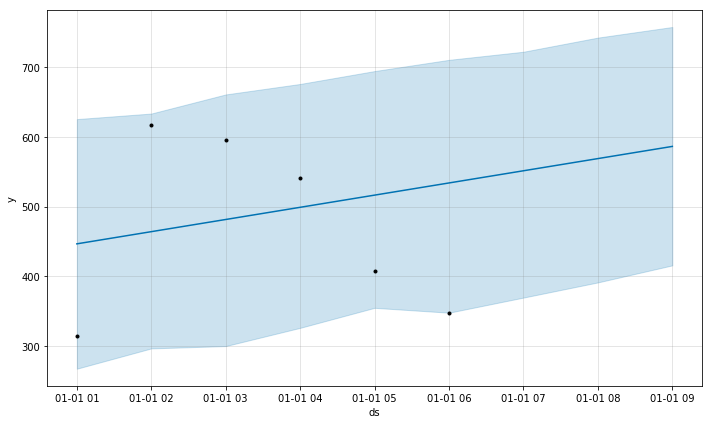

In [7]:
df = csv_array[people][seed][csv][area].copy()
model = Prophet(changepoint_prior_scale=0.01, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)
future = model.make_future_dataframe(periods=3, freq='H')
pred = model.predict(future)
fig = model.plot(pred)

In [8]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1900-01-01 01:00:00,446.609482,267.681197,625.365856,446.609482,446.609482,0.0,0.0,0.0,0.0,0.0,0.0,446.609482
1,1900-01-01 02:00:00,464.061173,296.768291,633.317745,464.061173,464.061173,0.0,0.0,0.0,0.0,0.0,0.0,464.061173
2,1900-01-01 03:00:00,481.512864,300.145426,660.696470,481.512864,481.512864,0.0,0.0,0.0,0.0,0.0,0.0,481.512864
3,1900-01-01 04:00:00,498.964556,326.230557,675.712226,498.964556,498.964556,0.0,0.0,0.0,0.0,0.0,0.0,498.964556
4,1900-01-01 05:00:00,516.416247,354.927100,694.188701,516.416247,516.416247,0.0,0.0,0.0,0.0,0.0,0.0,516.416247
5,1900-01-01 06:00:00,533.867939,347.946853,710.280642,533.867939,533.867939,0.0,0.0,0.0,0.0,0.0,0.0,533.867939
6,1900-01-01 07:00:00,551.319631,369.591771,721.888683,551.319630,551.319631,0.0,0.0,0.0,0.0,0.0,0.0,551.319631
7,1900-01-01 08:00:00,568.771322,391.333295,742.136178,568.771320,568.771324,0.0,0.0,0.0,0.0,0.0,0.0,568.771322
8,1900-01-01 09:00:00,586.223014,415.771767,757.346543,586.223009,586.223018,0.0,0.0,0.0,0.0,0.0,0.0,586.223014


0
0.6311688311689824
y = -1.429e-13x + -3.156e+05


1
0.024567788904549692
y = -1.19e-13x + -2.63e+05


2
0.25296167247281287
y =  8.73e-14x +  1.928e+05


3
1.0
y =  0.0x +  0.0


4
1.0
y =  0.0x +  0.0


5
1.0
y =  0.0x +  0.0


6
0.002168301496246694
y =  5.556e-14x +  1.228e+05


7
0.0
y =  2.949e-29x +  8.333


8
0.008744152572057295
y = -1.429e-13x + -3.155e+05


9
0.04285714285714304
y =  3.175e-14x +  7.013e+04


10
1.0
y =  0.0x +  0.0


11
1.0
y =  0.0x +  0.0


12
0.07389162561031548
y =  7.937e-14x +  1.753e+05


13
0.04198757763865246
y =  1.032e-13x +  2.279e+05


14
0.09464794019206102
y = -9.762e-13x + -2.156e+06


15
0.08605672139417243
y = -1.571e-12x + -3.471e+06


16
0.0050751879710463355
y =  4.762e-14x +  1.052e+05


17
0.1909476661951911
y = -1.19e-13x + -2.63e+05


18
0.017142857139323286
y = -3.175e-14x + -7.012e+04


19
0.006315789472248867
y =  5.556e-14x +  1.227e+05


20
0.03757338551859113
y = -1.27e-13x + -2.805e+05


21
0.0447355746121314
y = -4.095e-12x

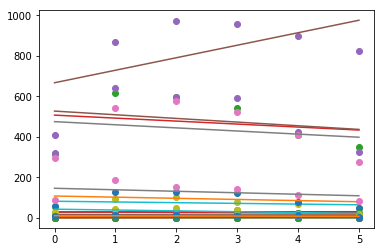

In [9]:
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns

for _area in range(36):
    df = csv_array[people][seed][csv][_area].copy()
    trainX = df['ds'].values.reshape(-1, 1)
    trainY = df['y'].values.reshape(-1, 1)
    model = LR()
    model.fit(trainX, trainY)
    print(_area)
    print(model.score(trainX, trainY))
    print('y = {0: .4}x + {1: .4}'.format(model.coef_[0, 0], model.intercept_[0]))
    print('\n')
    
    Px = np.arange(0, len(trainX), 1)
    plt.plot(Px, trainY, 'o')
    plt.plot(Px, model.predict(trainX))
    

In [10]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
def create_regplot(area, order=3):
    df = csv_array[people][seed][csv][area].copy()
    trainX = df['ds'].values.reshape(-1, 1)
    trainY = df['y'].values.reshape(-1, 1)
    Px = np.arange(0, len(trainX), 1)
    
#     print('エリア', area)
    ax = sns.regplot(x=Px, y=trainY, order=order, ci=75)

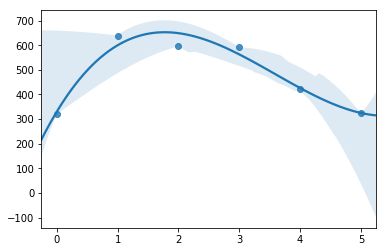

In [12]:
create_regplot(22, 3)